# CS170 - Introduction to Data Science (Jupyter Notebook)

## Instructions
Answer each line item by replacing the blanks with the necessary operator or a value. 
Make sure the kernel is set to Python 3**
Once done, right click the actual notebook page and print as PDF.
Last part of the notebook is the code for timestamp from your computer - Run it!.  

In [2]:
#Import the necesssary library such as pandas and matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
#read the dataset
pokemon = pd.read_csv('pokemon.csv ') 

In [4]:
pokemon.shape
#get the shape of the dataset

(801, 8)

In [5]:
pokemon.head(10) 
#complete the syntax to disply the first 10 rows of the record.

,pokedex_num,sp_attack,sp_defense,p_speed,p_generation,is_legendary,p_published,p_stamina
0,1,43,135,105,1,0,YES,10
1,2,58,196,24,1,0,YES,5
2,3,8,77,199,1,0,NO,5
3,4,73,20,69,1,0,YES,1
4,5,11,143,193,1,0,NO,3
5,6,124,174,112,1,0,NO,1
6,7,172,91,56,1,0,NO,5
7,8,109,62,75,1,0,YES,9
8,9,11,3,76,1,0,YES,5
9,10,25,15,16,1,0,NO,3


In [6]:
# complete the syntex by creating a crosstab of the record based on stamina and generation
crosstab_01 = pd.crosstab(pokemon['p_stamina'], pokemon['p_generation'])

<Axes: title={'center': 'Pokemon stamina by generation'}, xlabel='p_stamina'>

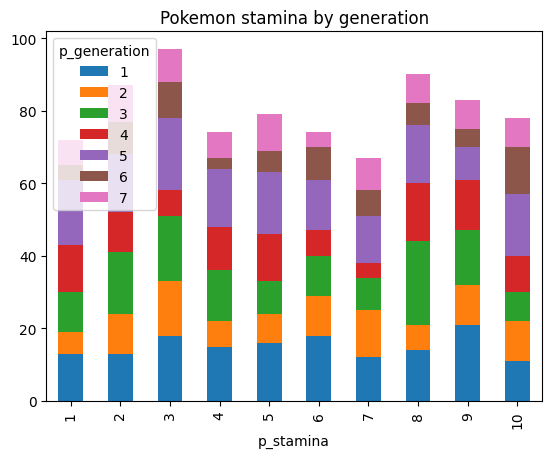

In [7]:
# plot a bar graph (frequency), make sure it is stacked
crosstab_01.plot(kind='bar', stacked = True, title = 'Pokemon stamina by generation') 

In [8]:
# create crosstab by using div and sum command.  
crosstab_norm = crosstab_01.div(crosstab_01.sum (1), axis=0 )  

<Axes: title={'center': 'Pokemon stamina by generation'}, xlabel='p_stamina'>

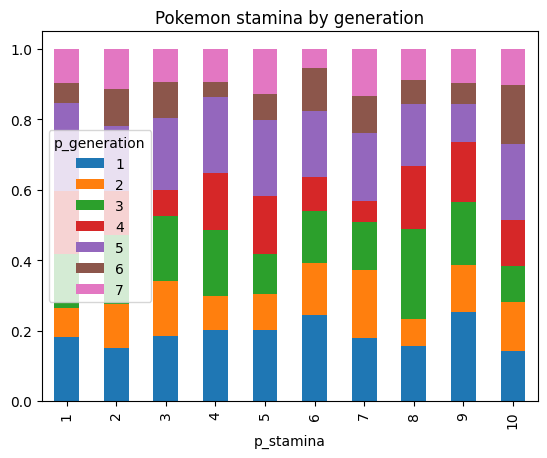

In [9]:
# plot a normalized bar type crosstab data  with proportions
crosstab_norm.plot(kind='bar', stacked= True , title = 'Pokemon stamina by generation')  

In [10]:
# create a contingency table showing the generation and legendary
crosstab_02 = pd.crosstab(pokemon['p_generation'], pokemon['is_legendary'])
crosstab_02.head(7)

is_legendary,0,1
p_generation,,
1,146,5
2,94,6
3,125,10
4,94,13
5,143,13
6,66,6
7,63,17


In [11]:
# create a contingency table showing the generation and legendary by its percentage
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100 , 1)

is_legendary,0,1
p_generation,,
1,20.0,7.1
2,12.9,8.6
3,17.1,14.3
4,12.9,18.6
5,19.6,18.6
6,9.0,8.6
7,8.6,24.3


In [12]:
# import required package second task 
import numpy as np  
import matplotlib.pyplot as plt  

In [13]:
# then using the percentage data, create a subset for each element of the overlay
# is legendary overlay generation
pok_y = pokemon[pokemon.is_legendary == 0]['p_generation']  
pok_n = pokemon[pokemon.is_legendary == 1]['p_generation'] 

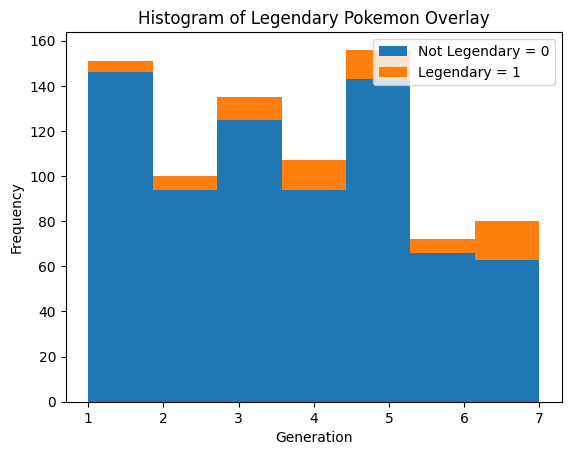

In [14]:
# now create a histogram based on the two subsets, 7 bins  

plt.hist([pok_y,pok_n], bins = 7, stacked = True)  
plt.legend(['Not Legendary = 0', 'Legendary = 1'])  
plt.title('Histogram of Legendary Pokemon Overlay')  
plt.xlabel('Generation'); plt.ylabel('Frequency'); plt.show() 

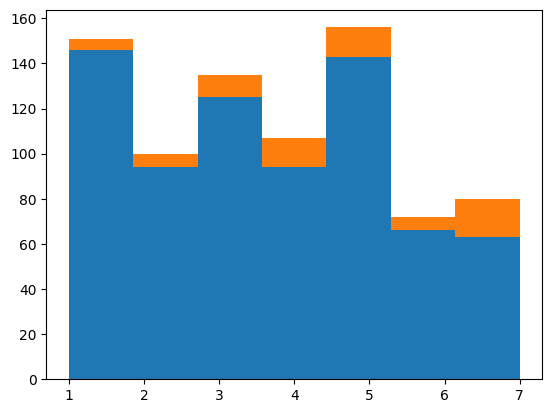

In [15]:
# save the output from the non-normalized plot into variables 
(n, bins, patches) = plt.hist([pok_y, pok_n], bins = 7, stacked = True)  

In [16]:
# create a table and combine the height of the variables into single array  
n_table = np.column_stack((n[0], n[1]))  

In [17]:
# divide each row by the sum of that row 
# no revisions on this
n_norm = n_table  / n_table.sum(axis=1)[:, None]

In [18]:
# determin upper and lower bounds of each bin (use the number of bins) 
ourbins = np.column_stack((bins[0:7], bins[1:8]))  

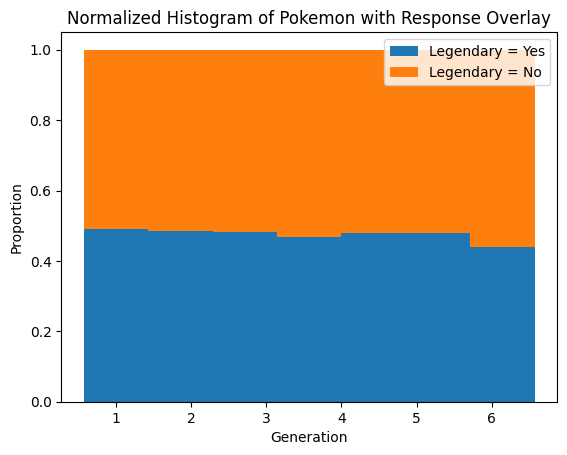

In [19]:
# construct normalized plot plt.bar p1 and p2 
p1 = plt.bar(x = ourbins[:, 0], height = n_norm[:, 0], width = ourbins[:, 1] - ourbins[:, 0])  
p2 = plt.bar(x = ourbins[:, 0], height = n_norm[:, 1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:, 0])  

#plot the table
plt.legend(['Legendary = Yes', 'Legendary = No'])  
plt.title('Normalized Histogram of Pokemon with Response Overlay')  
plt.xlabel('Generation'); plt.ylabel('Proportion'); plt.show()  

In [20]:
# use the cut function in Pandas to create the bins based on pokemon attack 
# should be: Under 50, 50 to 75, 75 to 100, and over 100 

pokemon['VAR'] = pd.cut(x = pokemon['sp_attack'], bins = [0, 50, 75.01, 100.01 ,200],  
labels=["Under 50", "50 to 75", "75 to 100" , "over 100"], right = True)  

In [21]:
# create contingency table based on its type (legendary and non-legendary) and if published on not
crosstab_02 = pd.crosstab(pokemon['is_legendary'], pokemon['p_published'])  
crosstab_02.head(4)


p_published,NO,YES
is_legendary,,
0,372,359
1,42,28


In [22]:
# then plot a crosstab data based on VAR 
crosstab_02 = pd.crosstab(pokemon['VAR'], pokemon['is_legendary'])  
crosstab_02.head(4)

is_legendary,0,1
VAR,,
Under 50,200,17
50 to 75,89,5
75 to 100,95,5
over 100,347,43


In [23]:
# craete a contingency table based on percentage
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100, 1)

is_legendary,0,1
VAR,,
Under 50,27.4,24.3
50 to 75,12.2,7.1
75 to 100,13.0,7.1
over 100,47.5,61.4


<Axes: title={'center': 'Bar Graph of VAR (Binned / Frequency) with Response Overlay'}, xlabel='VAR'>

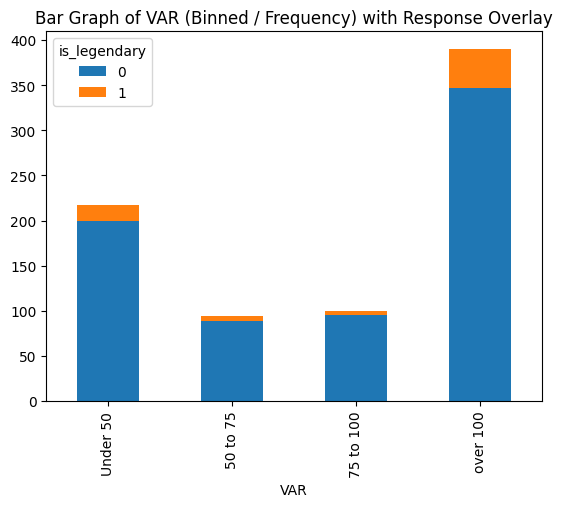

In [24]:
# then plot a binned bar graph of the crosstab data based on VAR (frequency)
crosstab_02.plot(kind='bar' , stacked = True, title = 'Bar Graph of VAR (Binned / Frequency) with Response Overlay')

In [25]:
crosstab_02 = pd.crosstab(pokemon['VAR'], pokemon['p_published'])
crosstab_02_norm = crosstab_02.div(crosstab_02.sum(1), axis = 0)

<Axes: title={'center': 'Bar Graph of VAR (Binned / Proportion) with Response Overlay'}, xlabel='VAR'>

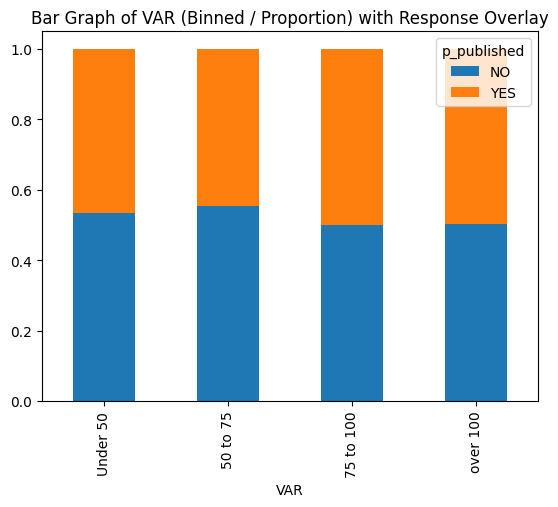

In [26]:
# then plot a binned bar graph of the crosstab data based on VAR (normalized) 
crosstab_02_norm.plot(kind='bar', stacked = True, title = 'Bar Graph of VAR (Binned / Proportion) with Response Overlay')

In [ ]:
import datetime
import socket 
def get_Host_name_IP(): 
    try: 
        host_name = socket.gethostname() 
        host_ip = socket.gethostbyname(host_name) 
        print("Hostname-7:",host_name) 
        print("IP Address:",host_ip) 
    except: 
        print("No visible IP Address") 
get_Host_name_IP()
now = datetime.datetime.now()
print ("Time Stamp:", now.strftime("%Y-%m-%d %H:%M:%S"))

<Axes: title={'center': 'Number of pokemon by its Generation'}, xlabel='p_generation'>

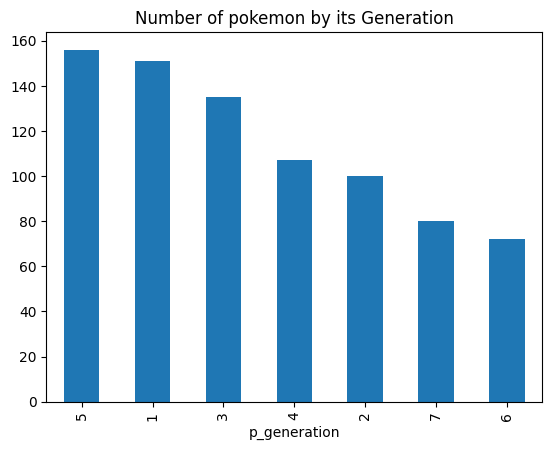

In [28]:
#create a bar chart showing the number of pokemons per generation
pok = pokemon['p_generation'].value_counts(); 
pok.plot(kind='bar', stacked=False, title="Number of pokemon by its Generation")


In [ ]:
#create a bar chart showing the number of pokemons per generation
#use pok variable.
import seaborn as sns
pok = sns.countplot(x = 'p_generation', data = pokemon)